<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [16]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
import io
import zipfile

In [17]:
# 1. Desde la URL del archivo ZIP
url_zip = "https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip"

# Descargamos el contenido del ZIP en memoria
response = requests.get(url_zip)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Listamos los archivos para estar seguros 
    
    # Leemos directamente el archivo 'wdbc.data' que está dentro del ZIP
    with z.open('wdbc.data') as f:
        # Definimos las columnas
        features = ["radius", "texture", "perimeter", "area", "smoothness", 
                    "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]
        
        column_names = ["ID", "Diagnosis"] + [f"{feat}_{type}" for type in ["mean", "se", "worst"] for feat in features]
        
        # Cargamos el dataframe
        df = pd.read_csv(f, header=None, names=column_names)

        # Eliminamos ID ya que no aporta valor predictivo y puede introducir ruido
        df.drop('ID', axis=1, inplace=True)

In [18]:
# 2. Renombrar columnas a PascalCase
# Función auxiliar para convertir snake_case a PascalCase
def to_pascal(text):
    return "".join(word.capitalize() for word in text.split('_'))

df.columns = [to_pascal(col) for col in df.columns]

In [19]:
df

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# 3. Métodos de inspección
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

  Diagnosis  RadiusMean  TextureMean  PerimeterMean  AreaMean  SmoothnessMean  \
0         M       17.99        10.38         122.80    1001.0         0.11840   
1         M       20.57        17.77         132.90    1326.0         0.08474   
2         M       19.69        21.25         130.00    1203.0         0.10960   
3         M       11.42        20.38          77.58     386.1         0.14250   
4         M       20.29        14.34         135.10    1297.0         0.10030   

   CompactnessMean  ConcavityMean  ConcavePointsMean  SymmetryMean  ...  \
0          0.27760         0.3001            0.14710        0.2419  ...   
1          0.07864         0.0869            0.07017        0.1812  ...   
2          0.15990         0.1974            0.12790        0.2069  ...   
3          0.28390         0.2414            0.10520        0.2597  ...   
4          0.13280         0.1980            0.10430        0.1809  ...   

   RadiusWorst  TextureWorst  PerimeterWorst  AreaWorst  Smoot

In [21]:
# 4. Contabilizar nulos
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

# Estrategia propuesta (Si hubiera nulos):
# Si la columna es numérica y tiene distribución sesgada: df.fillna(df.median(), inplace=True)
# En este caso es más robusto usar la mediana en lugar de la media, ya que al usar la media estariamos rellenando con valores "inflados" por los tumores gigantes.
# Al usar la mediana, nos aseguramos que los valores faltantes se llenen con un valor representativo del centro de la distribución sin verse afectados por valores extremos.

Series([], dtype: int64)


['M' 'B']


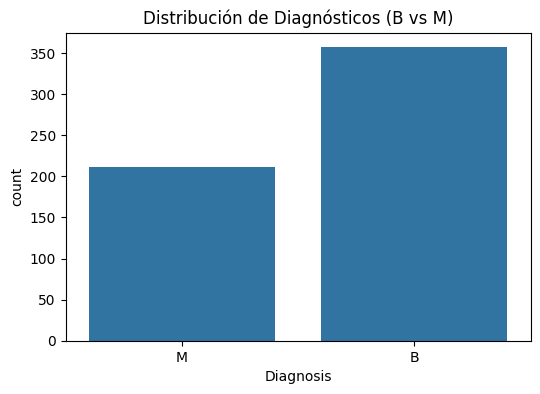

In [22]:
# 5. Valores únicos
print(df['Diagnosis'].unique())

# 6. Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribución de Diagnósticos (B vs M)')
plt.show()

# 7. Encoding numérico (B=0, M=1)
df['DiagnosisNumeric'] = df['Diagnosis'].map({'B': 0, 'M': 1})

In [23]:
# 8. Normalización (excluyendo columnas categóricas)
cols_to_norm = df.select_dtypes(include=[np.number]).columns
# Excluimos 'DiagnosisNumeric' de la normalización si queremos que siga siendo 0 y 1
cols_to_norm = cols_to_norm.drop('DiagnosisNumeric')

df_normalized = df.copy()
# Aplicamos la fórmula vectorizada
df_normalized[cols_to_norm] = (df[cols_to_norm] - df[cols_to_norm].mean()) / df[cols_to_norm].std()

In [24]:
# 9. Agrupar características similares
# Extraemos las raíces de los nombres (Radius, Texture, etc.) con validación de Match
base_features = []
for col in df.columns:
    if col not in ['Diagnosis', 'DiagnosisNumeric']:
        match = re.match(r'([A-Z][a-z]+)', col)
        if match:
            base_features.append(match.group(0))

# Eliminamos duplicados convirtiendo a set y luego a lista
base_features = list(set(base_features))

print(f"Patrones encontrados: {base_features}")

for base in base_features:
    # Filtramos columnas que empiecen con ese patrón
    # Usamos una lista para filtrar, lo cual es más seguro
    cols = [col for col in df.columns if col.startswith(base)]
    
    if cols:
        # Creamos una nueva columna promedio
        df[f'{base}AvgGlobal'] = df[cols].mean(axis=1)

# Visualización de las nuevas métricas globales
print(df.filter(like='AvgGlobal').head())

Patrones encontrados: ['Compactness', 'Concavity', 'Concave', 'Symmetry', 'Perimeter', 'Texture', 'Fractal', 'Smoothness', 'Area', 'Radius']
   CompactnessAvgGlobal  ConcavityAvgGlobal  ConcaveAvgGlobal  \
0              0.330747            0.355243          0.142790   
1              0.092773            0.115700          0.089857   
2              0.208153            0.228707          0.130493   
3              0.408260            0.328303          0.127123   
4              0.120803            0.218293          0.095217   

   SymmetryAvgGlobal  PerimeterAvgGlobal  TextureAvgGlobal  FractalAvgGlobal  \
0           0.244010          105.329667          9.538433          0.067934   
1           0.156697           98.366000         13.971300          0.049741   
2           0.196900           95.695000         15.855633          0.050714   
3           0.327710           59.965000         16.012000          0.093216   
4           0.144953           97.579333         10.597100          

In [25]:
# Extraemos las raíces de los nombres de forma segura
# Sustituimos la comprensión de lista para manejar casos donde re.match devuelva None
base_features_raw = []
for col in df.columns:
    if col not in ['Diagnosis', 'DiagnosisNumeric']:
        match = re.match(r'([A-Z][a-z]+)', col)
        if match:
            base_features_raw.append(match.group(0))

base_features = list(set(base_features_raw))

print(f"Patrones encontrados: {base_features}")

for base in base_features:
    # Filtramos columnas que empiecen con ese patrón
    cols = [col for col in df.columns if col.startswith(base)]
    
    if cols:
        # Creamos una nueva columna promedio
        # Especificamos numeric_only=True para ser explícitos y evitar warnings
        df[f'{base}AvgGlobal'] = df[cols].mean(axis=1)

print(df.filter(like='AvgGlobal').head())

Patrones encontrados: ['Compactness', 'Concavity', 'Concave', 'Symmetry', 'Perimeter', 'Texture', 'Fractal', 'Smoothness', 'Area', 'Radius']
   CompactnessAvgGlobal  ConcavityAvgGlobal  ConcaveAvgGlobal  \
0              0.330747            0.355243          0.142790   
1              0.092773            0.115700          0.089857   
2              0.208153            0.228707          0.130493   
3              0.408260            0.328303          0.127123   
4              0.120803            0.218293          0.095217   

   SymmetryAvgGlobal  PerimeterAvgGlobal  TextureAvgGlobal  FractalAvgGlobal  \
0           0.244010          105.329667          9.538433          0.067934   
1           0.156697           98.366000         13.971300          0.049741   
2           0.196900           95.695000         15.855633          0.050714   
3           0.327710           59.965000         16.012000          0.093216   
4           0.144953           97.579333         10.597100          

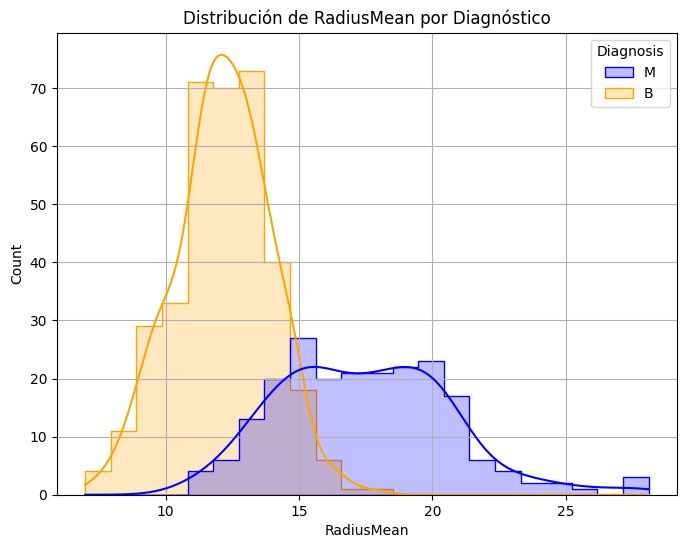

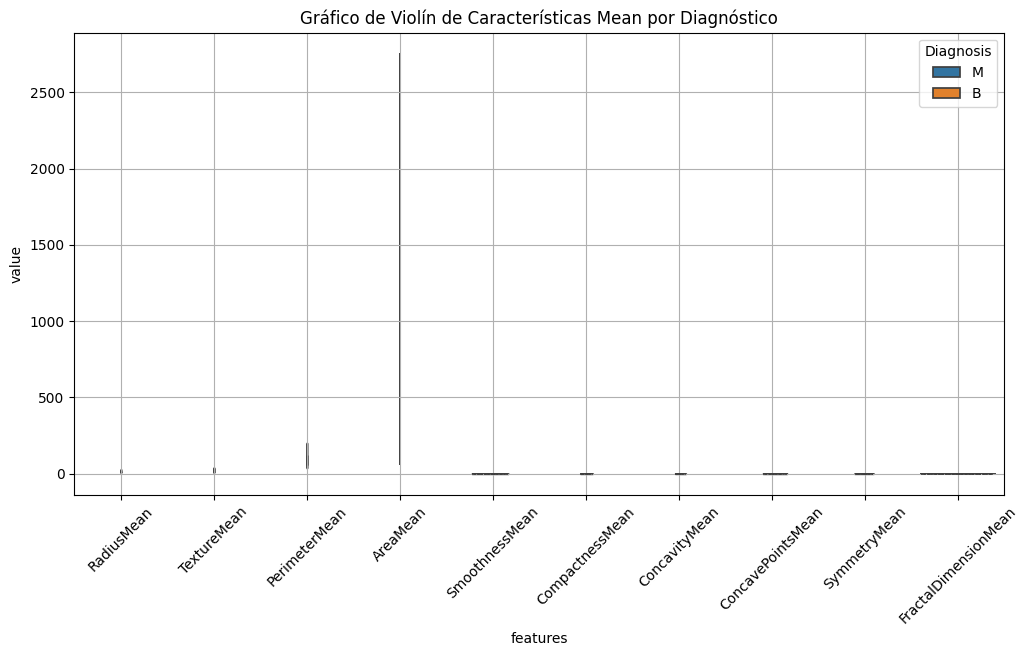

In [26]:
# 10. Histograma RadiusMean
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='RadiusMean', hue='Diagnosis', palette={'B': 'orange', 'M': 'blue'}, kde=True, element="step")
plt.title('Distribución de RadiusMean por Diagnóstico')
plt.grid()
plt.show()

# 11. Gráfico de Violín Múltiple
# Seleccionamos las columnas Mean para limpiar el gráfico
cols_violin = [col for col in df.columns if 'Mean' in col]
data_melted = pd.melt(df, id_vars=["Diagnosis"], value_vars=cols_violin, var_name="features", value_name="value")

plt.figure(figsize=(12, 6))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data_melted, split=True, inner="quart")
plt.xticks(rotation=45)
plt.title('Gráfico de Violín de Características Mean por Diagnóstico')
plt.grid()
plt.show()

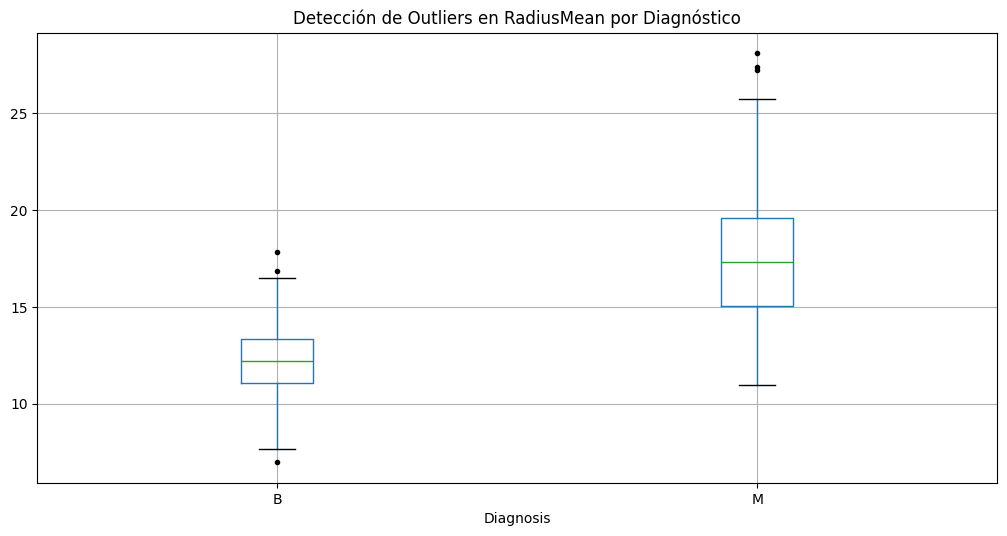

Límite inferior: 5.58
Límite superior: 21.90
Registros eliminados: 14


In [ ]:
# 12. Visualización inicial: Construimos el Boxplot para 'RadiusMean'
# Esto nos permite ver los puntos negros (outliers) fuera de los "bigotes"
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(12,6))
plt.title("Detección de Outliers en RadiusMean por Diagnóstico")
plt.suptitle("") # Elimina el título automático redundante
plt.show()

# Cálculo matemático del IQR para 'RadiusMean'
col = 'RadiusMean'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites técnico-estadísticos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminación de los outliers
# El símbolo ~ significa "NO", es decir: "Mantén lo que NO sea un outlier"
df_clean = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")
print(f"Registros eliminados: {len(df) - len(df_clean)}")

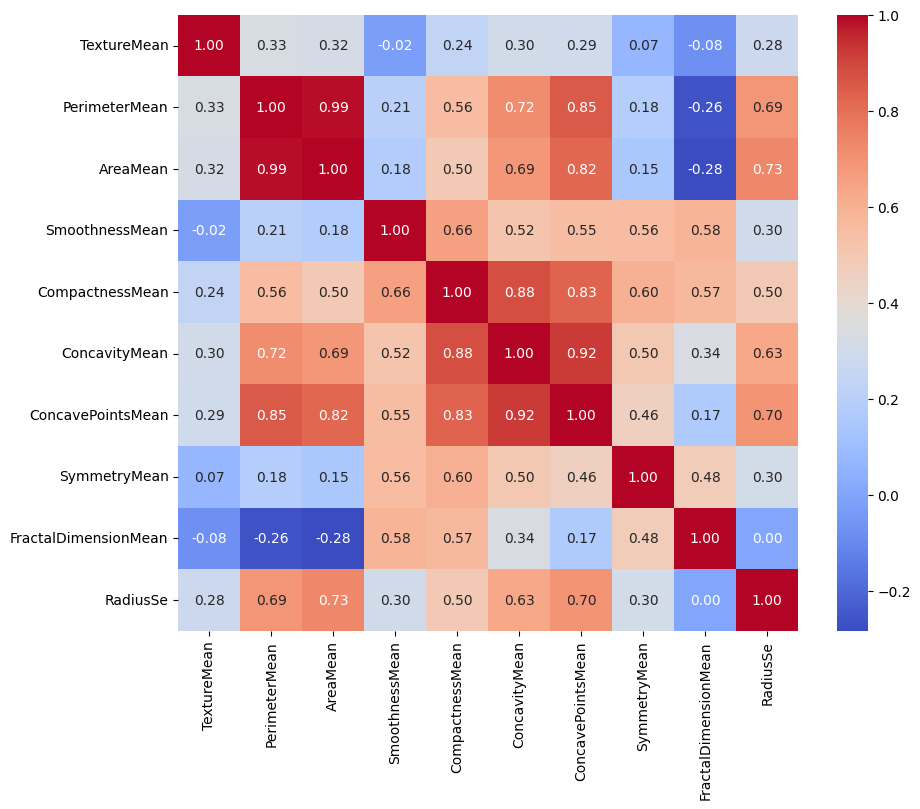

In [28]:
# 13. Matriz de Correlación
# Usamos df_clean o df según decidas sobre los outliers
corr_matrix = df.iloc[:, 2:12].corr() # Solo las primeras features 'Mean' para que sea legible

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

14. ¿Qué otros gráficos sugieres?

* Pairplot (Seaborn): Fundamental para ver relaciones bivariadas y separabilidad de clases. sns.pairplot(df[['RadiusMean', 'TextureMean', 'PerimeterMean', 'Diagnosis']], hue='Diagnosis')

* Scatter Plot 2D con PCA: Como hay 30 dimensiones, reducir a 2 componentes principales (PCA) ayuda a visualizar si las clases son linealmente separables en un espacio reducido.